Seaborn - matplotlib add on toolkits

to output plots in the Jupyter notebook: `%matplotlib inline`

# 9.1 A brief matplotlib API Primer


In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

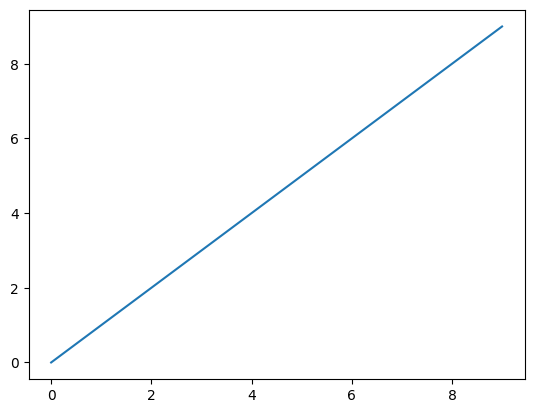

In [5]:
data = np.arange(10)

plt.plot(data)


## Figures and Subplots

Plots in matplotlib reside within a Figure object.
To create a new figure use plt.figure

`fig = plt.figure()`

figsize will guarantee the figure has a certain size and aspect ratio of saved to disk

You can't make a plot with a blank figure. You have to create subplots using add_subplot

`ax1 = fig.add_subplot(2, 2, 1)`

It is preferred to use the axis methods over the top-level plotting functions like plt.plot


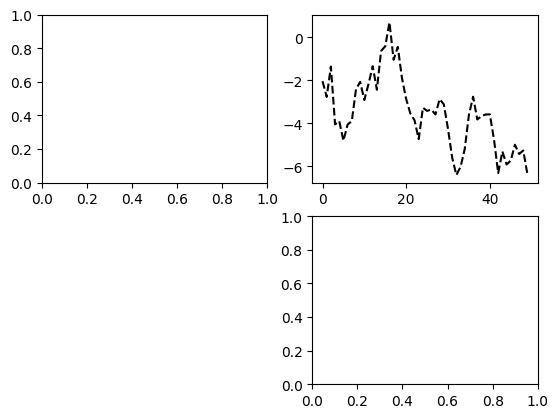

In [18]:
fig = plt.figure()

# Figure should be 2 x 2, up to 4 plots in total, 1st figure been selected
# plot axis objects have various methods that create different types of plots
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 4)

ax2.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")


The objects returned by fig.add_subplot here are AxesSubplot objects.
You can directly plot on the other empty subplots by calling each one's instance method


In [19]:
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)

ax3.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))


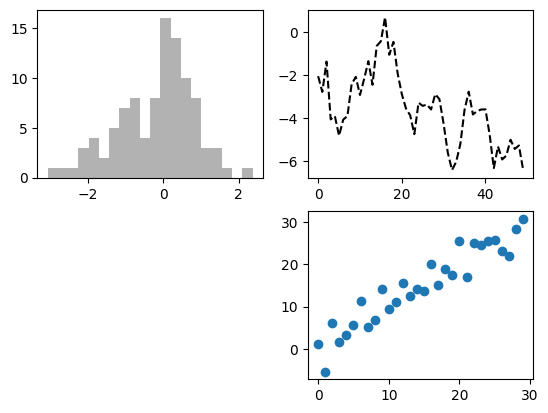

In [24]:
fig


Use plt.subplots method to create a new figure and returns a NumPy array containing the created subplot objects


array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

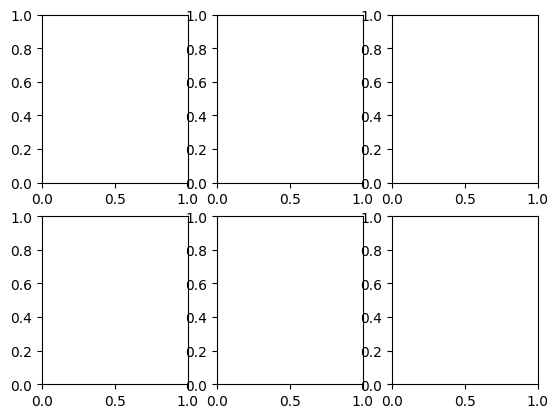

In [26]:
fig, axes = plt.subplots(2, 3)

axes
# Same as when create ax1 to ax6 elements with fig.add_subplot()


## Adjust spacing around subplots


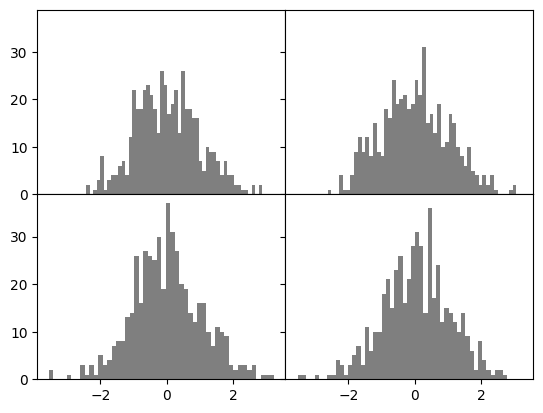

In [3]:
# Shrink the spacing all the way to 0
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(
            np.random.standard_normal(500), bins=50, color="black", alpha=0.5
        )

fig.subplots_adjust(wspace=0, hspace=0)


## Colors, Markers and Line Styles

plot x versus y with green dashes
`ax.plot(x, y, linestyle="--"l color="green")`

Line plots can additionally have markers to highlight the actual data points


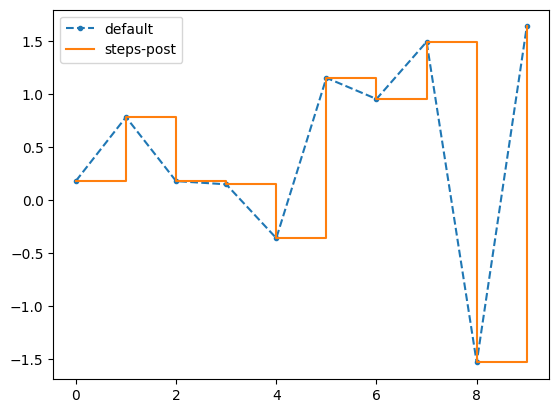

In [26]:
fig, ax = plt.subplots(1, 1)

x = np.arange(10)
y = np.random.standard_normal(10)

ax.plot(x, y, linestyle="--", marker=".", label="default")

# Use drawstyle to change how the sequence is interpolated
ax.plot(x, y, drawstyle="steps-post", label="steps-post")

# Call legend method to show the labels
ax.legend()


## Ticks, Labels and Legends

Most kinds of plot decorations can be accessed through methods on matplotlib axes objects.
xlim, xticks, xticklabels

Controls the plot range, tick locations and tick labels

All such methods act on the active or most recently created AxesSubplot

### Setting the title, axis labels, ticks and tick labels


[Text(0.5, 1.0, 'My first matplot plot'),
 Text(0.5, 0, 'Stages'),
 Text(0, 0.5, 'Value')]

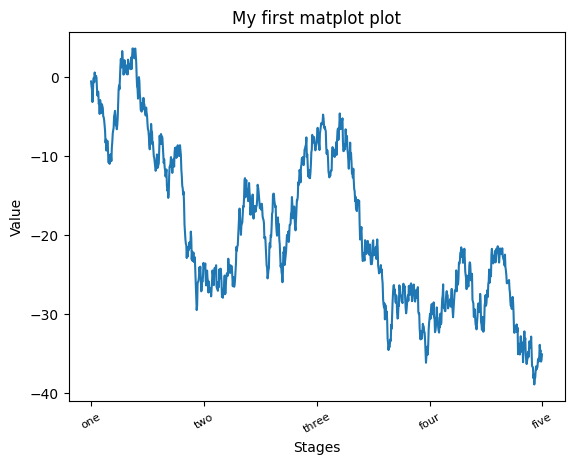

In [31]:
fig, ax = plt.subplots()

ax.plot(np.random.standard_normal(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])

# Use set_xticks and set_xticklabels to place the ticks along the datarange
# the rotation option sets the x tick label at 30 degree rotaton
labels = ax.set_xticklabels(
    ["one", "two", "three", "four", "five"], rotation=30, fontsize=8
)

# Give a name to the x-axis
ax.set_xlabel('Stages')

# Set the subplot title
ax.set_title('My first matplotlib plot')

# Use set method to batch setting plot properties
ax.set(title="My first matplot plot", xlabel="Stages", ylabel="Value")


### Adding Legends
Pass the label argument when adding each piece of the plot

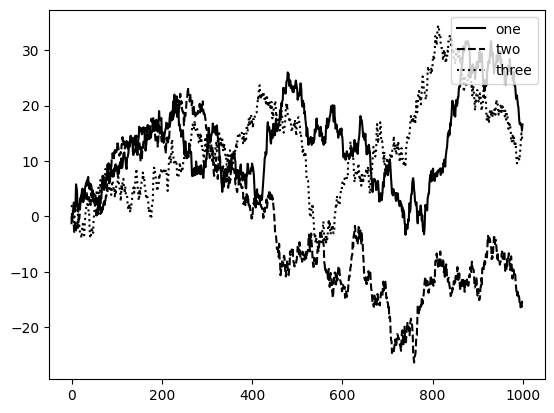

In [43]:
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), color="black", label="one")
ax.plot(np.random.randn(1000).cumsum(), color="black", label="two", linestyle='--')
ax.plot(np.random.randn(1000).cumsum(), color="black", label="three", linestyle='dotted')

ax.legend(loc="upper right")

In [42]:
ax.legend?

Signature: ax.legend(*args, **kwargs)
Docstring:
Place a legend on the Axes.

Call signatures::

    legend()
    legend(handles, labels)
    legend(handles=handles)
    legend(labels)

The call signatures correspond to the following different ways to use
this method:

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

.. note::
    Specific artists can be excluded from the automatic legend element
    selection by using a label starting with an underscore, "_".
    A string starting with an underscore is the default label for all
    artist